# 色彩空间类型转换

[Changing Colorspaces](https://docs.opencv.org/4.7.0/df/d9d/tutorial_py_colorspaces.html)

每个色彩空间都有自己擅长的处理问题的领域。为了更方便地处理某个具体问题，就要用到色彩空间类型转换。

色彩空间类型转换是指，将图像从一个色彩空间转换到另外一个色彩空间。例如，在使用OpenCV处理图像时，可能会在RGB色彩空间和HSV色彩空间之间进行转换。在进行图像的特征提取、距离计算时，往往先将图像从RGB色彩空间处理为灰度色彩空间。在一些应用中，可能需要将色彩空间的图像转换为二值图像。

## Goal

* In this tutorial, you will learn how to convert images from one color-space to another, like BGR ↔ Gray, BGR ↔ HSV, etc.
* ~In addition to that, we will create an application to extract a colored object in a video~
* You will learn the following functions: `cv.cvtColor()`, `cv.inRange()`, etc.

In [1]:
import time
t0 = time.time()

# 初始化 opencv
import cv2
print(f"load opencv lib used {(time.time() - t0):.2f}s")

# https://github.com/opencv/opencv/tree/4.x/samples/data
# cv2.samples.addSamplesDataSearchPath("./images")
picture_file = cv2.samples.findFile("images/starry_night.jpg")
print(f"locate starry_night.jpg: {picture_file}")

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

load opencv lib used 0.16s
locate starry_night.jpg: images/starry_night.jpg


## 函数介绍

### [cvtColor()](https://docs.opencv.org/4.7.0/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab)

```
void cv::cvtColor (
 	InputArray 	src,
 	OutputArray 	dst,
 	int 	 	code,
 	int 	 	dstCn = 0 
)

Python: cv.cvtColor( src, code[, dst[, dstCn]] ) -> dst

```

* `dst` 表示输出图像，与原始输入图像具有同样的数据类型和深度。
* `src` 表示原始输入图像。可以是8位无符号图像、16位无符号图像，或者单精度浮点数等。
* `code` 是色彩空间转换码，表4-2展示了其枚举值。
* `dstCn` 是目标图像的通道数。如果参数为默认的0，则通道数自动通过原始输入图像和code得到。

The conventional ranges for R, G, and B channel values are:
* 0 to 255 for CV_8U images
* 0 to 65535 for CV_16U images
* 0 to 1 for CV_32F images


```
enum cv::ColorConversionCodes {
  cv::COLOR_BGR2BGRA = 0,
  cv::COLOR_RGB2RGBA = COLOR_BGR2BGRA,
  cv::COLOR_BGRA2BGR = 1,
  cv::COLOR_RGBA2RGB = COLOR_BGRA2BGR,
  cv::COLOR_BGR2RGBA = 2,
  cv::COLOR_RGB2BGRA = COLOR_BGR2RGBA,
  cv::COLOR_RGBA2BGR = 3,
  cv::COLOR_BGRA2RGB = COLOR_RGBA2BGR,
  cv::COLOR_BGR2RGB = 4,
  cv::COLOR_RGB2BGR = COLOR_BGR2RGB,
  cv::COLOR_BGRA2RGBA = 5,
  cv::COLOR_RGBA2BGRA = COLOR_BGRA2RGBA,
  cv::COLOR_BGR2GRAY = 6,
  cv::COLOR_RGB2GRAY = 7,
  cv::COLOR_GRAY2BGR = 8,
  ...
}
```


### [inRange()](https://docs.opencv.org/4.7.0/d2/de8/group__core__array.html#ga48af0ab51e36436c5d04340e036ce981)

这个函数用来判断图像内像素点的像素值是否在指定的范围内

```
void cv::inRange (
	InputArray 	src,
	InputArray 	lowerb,
	InputArray 	upperb,
	OutputArray	dst 
)


Python: cv.inRange( src, lowerb, upperb[, dst] ) -> dst

```

BGR ==> GRAY: Shape from (600, 752, 3) to (600, 752)


Text(0.5, 1.0, 'GRAY')

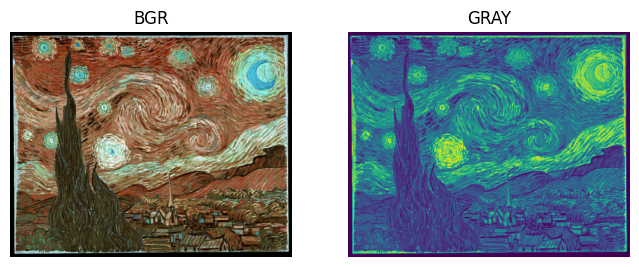

In [2]:
# BGR ==> GRAY
# img=np.random.randint(0,256, size=[2,4,3], dtype=np.uint8)
color=cv2.imread(picture_file, cv2.IMREAD_COLOR)
gray=cv2.cvtColor(color, cv2.COLOR_BGR2GRAY)
print(f"BGR ==> GRAY: Shape from {color.shape} to {gray.shape}")

# create figure size: width * height
fig = plt.figure(figsize=(8, 4))
rows, columns = 1, 2
# Adds a subplot (rows, columns) at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(color)
plt.axis('off')
plt.title("BGR")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(gray)
plt.axis('off')
plt.title("GRAY")


In [3]:

color_point = color[10,10,:] # 彩色像素点(10,10)
gray_point = gray[10,10]
print(f"Convert color pixel {color_point} to {gray_point}")

# 当图像由RGB色彩空间转换到GRAY色彩空间时，其处理方式如下：Gray=0.299·R+0.587·G+0.114·B
color_point[2]*0.299 + color_point[1]*0.587 + color_point[0]*0.114

Convert color pixel [ 86 118 123] to 116


115.847

## HSV 色彩空间
RGB 色彩空间是一种被广泛接受的色彩空间，但是该色彩空间过于抽象，我们不能够直接通过其值感知具体的色彩。

我们更习惯使用直观的方式来感知颜色，HSV 色彩空间提供了这样的方式。通过 HSV 色彩空间，我们能够更加方便地通过色调、饱和度和亮度来感知颜色。

HSV色彩空间从心理学和视觉的角度出发，提出人眼的色彩知觉主要包含三要素：

- H：色调（Hue，也称为色相）
- S：饱和度（Saturation）
- V：亮度（Value）

色调值为 0 表示红色，60 为黄色，120 为绿色，240 为蓝色，300表示品红色

In [4]:
# 测试 OpenCV 中蓝色的 HSV 模式值
imgBlue=np.zeros([1,1,3], dtype=np.uint8)
imgBlue[0,0,0]=255
Blue=imgBlue
BlueHSV=cv2.cvtColor(Blue, cv2.COLOR_BGR2HSV)
print(f"Blue={Blue}, BlueHSV={BlueHSV}")

# 测测试 OpenCV 中绿色的HSV模式值
imgGreen=np.zeros([1,1,3], dtype=np.uint8)
imgGreen[0,0,1]=255
Green=imgGreen
GreenHSV=cv2.cvtColor(Green, cv2.COLOR_BGR2HSV)
print(f"Green={Green}, GreenHSV={GreenHSV}")

# 测试 OpenCV 中红色的HSV模式值
imgRed=np.zeros([1,1,3], dtype=np.uint8)
imgRed[0,0,2]=255
Red=imgRed
RedHSV=cv2.cvtColor(Red, cv2.COLOR_BGR2HSV)
print(f"Red={Red}, RedHSV={RedHSV}")

Blue=[[[255   0   0]]], BlueHSV=[[[120 255 255]]]
Green=[[[  0 255   0]]], GreenHSV=[[[ 60 255 255]]]
Red=[[[  0   0 255]]], RedHSV=[[[  0 255 255]]]


In [5]:
# 使用 cv2.inRange()将某个图像内的在[100,200]内的值标注出来
img = np.random.randint(0,256, size=[5,5], dtype=np.uint8)
min, max = 100,200
mask = cv2.inRange(img, min, max)
print(f"img=\n{img}")
print(f"mask=\n{mask}")

img=
[[205 248  89 202 206]
 [ 64 234 223 122 252]
 [232  93 150 159 166]
 [ 60 250 120 205  88]
 [183 125  98  45  81]]
mask=
[[  0   0   0   0   0]
 [  0   0   0 255   0]
 [  0   0 255 255 255]
 [  0   0 255   0   0]
 [255 255   0   0   0]]


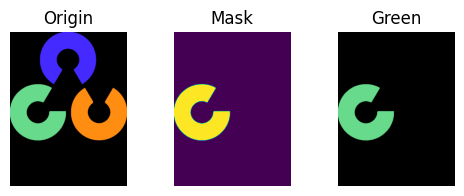

In [6]:
# Object Tracking

# 1. Convert BGR to HSV
img=cv2.imread("images/opencv-logo.png")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 2. Define range of green color in HSV
lower_green = np.array([50,50,50])
upper_green = np.array([70,255,255])

# 3. Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_green, upper_green)
# Bitwise-AND mask and original image
res = cv2.bitwise_and(img, img, mask=mask)

# Include plot_util.py from local path
from plot_util import subplot

rows, columns = 1, 3
subplot(rows, columns, [img, mask, res], ["Origin", "Mask", "Green"])

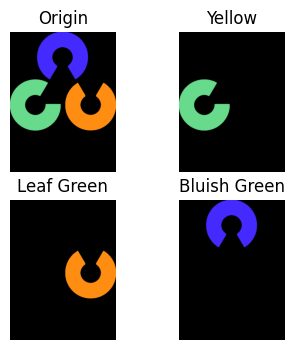

In [7]:
opencv=cv2.imread("images/opencv-logo.png")
hsv = cv2.cvtColor(opencv, cv2.COLOR_BGR2HSV)

def get_color_range(img, min_, max_):
    mask = cv2.inRange(img, min_, max_)
    # 通过掩码控制的按位与运算，锁定选择颜色区域
    return cv2.bitwise_and(opencv, opencv, mask=mask)

# [Hue Range](https://en.wikipedia.org/wiki/Hue)

# 1. Range of Yellow color in HSV
lower_yellow = np.array([45,50,50])
upper_yellow = np.array([60,255,255])

yellow = get_color_range(hsv, lower_yellow, upper_yellow)

# 2. Range of Leaf Green color in HSV
lower_green = np.array([100,50,50])
upper_green = np.array([110,255,255])

green = get_color_range(hsv, lower_green, upper_green)

# 3. Range of bluish green color in HSV
lower_blue = np.array([174,50,50])
upper_blue = np.array([176,255,255])

blue = get_color_range(hsv, lower_blue, upper_blue)

rows, columns = 2, 2
subplot(rows, columns, [opencv, yellow, green, blue], ["Origin", "Yellow", "Leaf Green", "Bluish Green"])

## 思考题🤔

我是如何选出来颜色的范围的呢？